16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


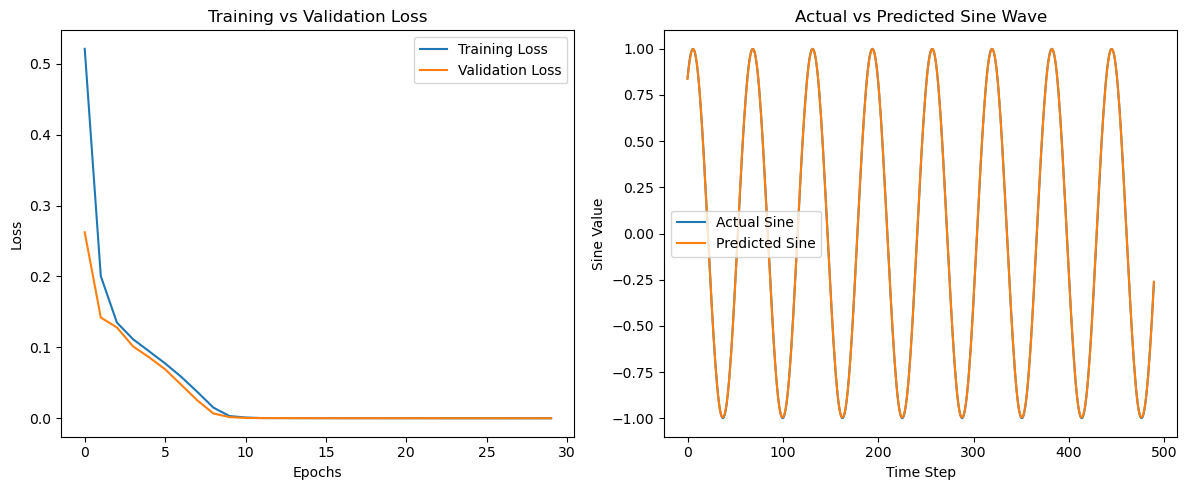

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

x = np.linspace(0, 50, 500)
y = np.sin(x)

def create_dataset(x, y, look_back=10):
    X, Y = [], []
    for i in range(len(x) - look_back):
        X.append(y[i:(i + look_back)])
        Y.append(y[i + look_back])
    return np.array(X), np.array(Y)

look_back = 10
X, Y = create_dataset(x, y, look_back)

X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential([
    LSTM(50, input_shape=(look_back, 1)),
    Dense(1)
])

model.compile(optimizer=Adam(), loss='mse')

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, verbose=0)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

predictions = model.predict(X)

plt.subplot(1, 2, 2)
plt.plot(y[look_back:], label='Actual Sine')
plt.plot(predictions, label='Predicted Sine')
plt.title("Actual vs Predicted Sine Wave")
plt.xlabel("Time Step")
plt.ylabel("Sine Value")
plt.legend()

plt.tight_layout()
plt.show()
